## Main research question: Are PCE and consumer excessing saving related?

### assumption: higher PCE has negative impact on cnosumer excessing.

In [1]:
# import gzip
# import shutil
import os
import pandas as pd
# from ast import literal_eval
import json
from datetime import datetime
# from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
import requests

In [2]:
df = pd.read_excel("Section2All_xls.xlsx", sheet_name='U20406-Q', header=7)

rename= {'Unnamed: 1':'Name', 'Unnamed: 2': 'Shortname'}

df = df.rename(columns=rename)
df['Name'] = df['Name'].str.strip()
df.head()

,Line,Name,Shortname,2002Q1,2002Q2,2002Q3,2002Q4,2003Q1,2003Q2,2003Q3,...,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1
0,1,Personal consumption expenditures,DPCERX,9027548,9073212,9136709,9187527,9232782,9338495,9470541,...,13046614,13386763,13773688,13874396,13981514,14028383,14099456,14178562,14214863,14346593
1,2,Goods,DGDSRX,2920485,2928602,2964792,2976590,2992972,3058219,3144202,...,5195517,5496466,5649883,5534607,5566740,5565721,5529616,5524520,5523592,5608957
2,3,Durable goods,DDURRX,806111,811170,835494,827872,828636,866272,904603,...,2086606,2288595,2347001,2205953,2233545,2275078,2259199,2254417,2247250,2334368
3,4,Motor vehicles and parts,DMOTRX,410109,408657,435051,413938,411002,428130,441410,...,579018,649467,668932,563801,573643,594655,578731,559755,565519,619820
4,5,New motor vehicles (55),DNMVRX,250782,235108,261869,253124,247028,262414,271966,...,325373,350562,363542,283348,291000,332231,308400,293562,298334,325399


In [3]:
anchor = '2019Q1'

# Find the position of the column name
col_position = df.columns.tolist().index(anchor)

pce = df.iloc[:,71:]

pce.head()

,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1
0,12955727,13038854,13148857,13225609,13016750,11817147,12922381,13046614,13386763,13773688,13874396,13981514,14028383,14099456,14178562,14214863,14346593
1,4623552,4685461,4751964,4785223,4785022,4651091,5191262,5195517,5496466,5649883,5534607,5566740,5565721,5529616,5524520,5523592,5608957
2,1683229,1719519,1762251,1795274,1742347,1744176,2083524,2086606,2288595,2347001,2205953,2233545,2275078,2259199,2254417,2247250,2334368
3,511394,518068,523467,535230,485293,480114,576764,579018,649467,668932,563801,573643,594655,578731,559755,565519,619820
4,265059,273524,284746,290059,255678,245621,306763,325373,350562,363542,283348,291000,332231,308400,293562,298334,325399


In [4]:
df_name  = df[['Name', 'Shortname']]

final_pce = df_name.join(pce)

final_pce = final_pce.iloc[:406,:]

final_pce

,Name,Shortname,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1
0,Personal consumption expenditures,DPCERX,12955727,13038854,13148857,13225609,13016750,11817147,12922381,13046614,13386763,13773688,13874396,13981514,14028383,14099456,14178562,14214863,14346593
1,Goods,DGDSRX,4623552,4685461,4751964,4785223,4785022,4651091,5191262,5195517,5496466,5649883,5534607,5566740,5565721,5529616,5524520,5523592,5608957
2,Durable goods,DDURRX,1683229,1719519,1762251,1795274,1742347,1744176,2083524,2086606,2288595,2347001,2205953,2233545,2275078,2259199,2254417,2247250,2334368
3,Motor vehicles and parts,DMOTRX,511394,518068,523467,535230,485293,480114,576764,579018,649467,668932,563801,573643,594655,578731,559755,565519,619820
4,New motor vehicles (55),DNMVRX,265059,273524,284746,290059,255678,245621,306763,325373,350562,363542,283348,291000,332231,308400,293562,298334,325399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,Market-based PCE child care,DCHCRX,36087,36496,37093,36510,37761,20526,26953,27441,28313,30176,32077,33179,36332,37673,39164,36190,34902
402,Market-based PCE household maintenance,DHMMRX,73274,73232,73236,73849,73530,69676,71071,70685,70764,69026,68550,69202,69154,69708,69477,69892,70454
403,Market-based PCE food and energy,DPMFRX,1658405,1659451,1678680,1673707,1704889,1656056,1698766,1684166,1740327,1767892,1776348,1771285,1753448,1721691,1703028,1711387,1698729
404,Market-based PCE excluding food,DMXFRX,10536364,10624699,10731214,10811580,10498280,9321430,10423876,10535779,10843667,11225270,11311805,11404055,11477467,11543100,11606706,11654113,11777219


In [5]:
interest =['Market-based PCE housing services', 
           'Market-based PCE household utilities',
           'Market-based PCE health care',
           'Market-based PCE transportation services',
           'Market-based PCE recreation services',
           'Market-based PCE food services and accommodations',
           'Market-based PCE financial services and insurance',
           'Market-based PCE other services'
]

df = final_pce[final_pce['Name'].isin(interest)]

df = df.drop(columns=['Shortname'])

df = df.reset_index(drop=True)

In [6]:
melt_df = pd.melt( df, id_vars='Name', var_name='Period', value_name='Millions of chained (2012) dollars')
melt_df

,Name,Period,Millions of chained (2012) dollars
0,Market-based PCE housing services,2019Q1,1765828
1,Market-based PCE household utilities,2019Q1,313060
2,Market-based PCE health care,2019Q1,2214959
3,Market-based PCE transportation services,2019Q1,441618
4,Market-based PCE recreation services,2019Q1,379821
...,...,...,...
131,Market-based PCE transportation services,2023Q1,435045
132,Market-based PCE recreation services,2023Q1,363615
133,Market-based PCE food services and accommodations,2023Q1,921730
134,Market-based PCE financial services and insurance,2023Q1,148890


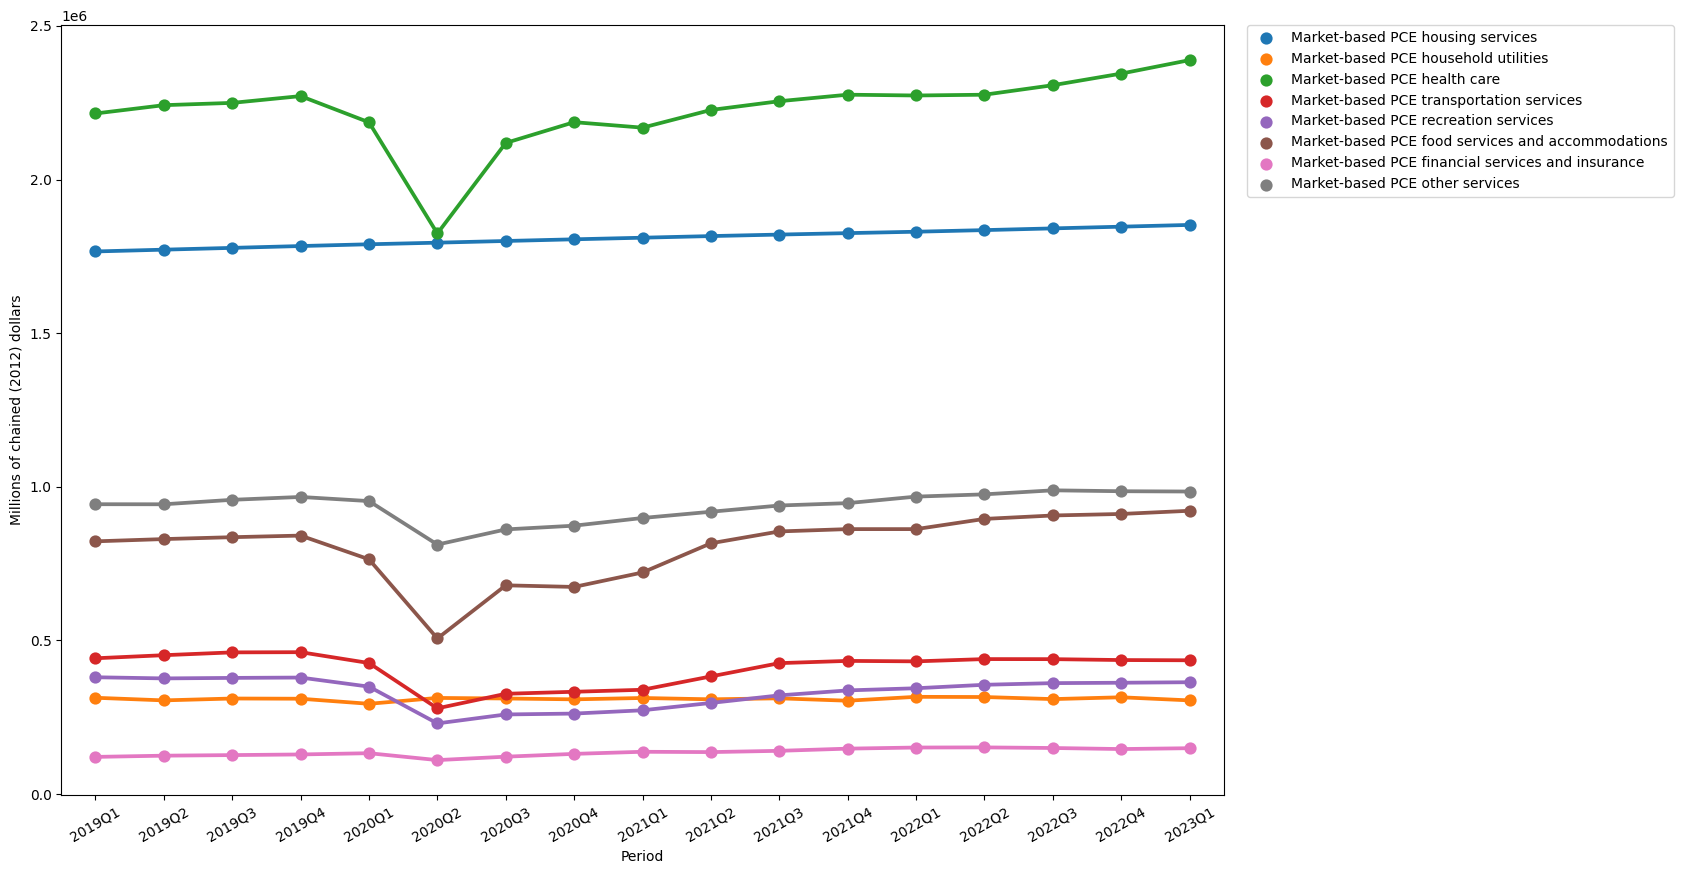

In [7]:
fig, ax = plt.subplots(figsize = ( 15 , 10 ))

sns.pointplot(melt_df, x= 'Period', y= 'Millions of chained (2012) dollars', hue='Name')

plt.xticks(rotation = 30)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)